In [1]:
import atlite
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

import cartopy.crs as ccrs
from cartopy.crs import PlateCarree as plate
import cartopy.io.shapereader as shpreader
from matplotlib.gridspec import GridSpec
import seaborn as sns
import geopandas as gpd
import yaml

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

In [233]:
cutout_test = atlite.Cutout(path="test.nc",
                       module="era5",
                       x=slice(-13.6913, 9),
                       y=slice(49.9096, 55),
                       time="2011-01",
                       #features = ["wave_height", "wave_period"]
                       )


INFO:atlite.cutout:Building new cutout test.nc


In [234]:

cutout_test.prepare()

INFO:atlite.data:Storing temporary files in C:\Users\felix\AppData\Local\Temp\tmpax73r0iy
INFO:atlite.data:Calculating and writing with module era5:
INFO:atlite.datasets.era5:Requesting data for feature height...
INFO:atlite.datasets.era5:Requesting data for feature runoff...
INFO:atlite.datasets.era5:Requesting data for feature wave_height...
INFO:atlite.datasets.era5:Requesting data for feature wind...
INFO:atlite.datasets.era5:Requesting data for feature wave_period...
INFO:atlite.datasets.era5:Requesting data for feature influx...
INFO:atlite.datasets.era5:Requesting data for feature temperature...
INFO:atlite.datasets.era5:CDS: Downloading variables
	 * 2m_temperature (2011)
	 * soil_temperature_level_4 (2011)

INFO:atlite.datasets.era5:CDS: Downloading variables
	 * surface_net_solar_radiation (2011)
	 * surface_solar_radiation_downwards (2011)
	 * toa_incident_solar_radiation (2011)
	 * total_sky_direct_solar_radiation_at_surface (2011)

INFO:atlite.datasets.era5:CDS: Downloadin

[########################################] | 100% Completed |  0.6s


<Cutout "test">
 x = -13.50 ⟷ 9.00, dx = 0.25
 y = 50.00 ⟷ 55.00, dy = 0.25
 time = 2011-01-01 ⟷ 2011-01-31, dt = H
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff', 'wave_height', 'wave_period']

In [236]:
cutout_test.data

<xarray.Dataset>
Dimensions:           (x: 91, y: 21, time: 744)
Coordinates:
  * x                 (x) float64 -13.5 -13.25 -13.0 -12.75 ... 8.5 8.75 9.0
  * y                 (y) float64 50.0 50.25 50.5 50.75 ... 54.5 54.75 55.0
  * time              (time) datetime64[ns] 2011-01-01 ... 2011-01-31T23:00:00
    lon               (x) float64 dask.array<chunksize=(91,), meta=np.ndarray>
    lat               (y) float64 dask.array<chunksize=(21,), meta=np.ndarray>
Data variables: (12/15)
    height            (y, x) float32 dask.array<chunksize=(21, 91), meta=np.ndarray>
    wnd100m           (time, y, x) float32 dask.array<chunksize=(100, 21, 91), meta=np.ndarray>
    wnd_azimuth       (time, y, x) float32 dask.array<chunksize=(100, 21, 91), meta=np.ndarray>
    roughness         (time, y, x) float32 dask.array<chunksize=(100, 21, 91), meta=np.ndarray>
    influx_toa        (time, y, x) float32 dask.array<chunksize=(100, 21, 91), meta=np.ndarray>
    influx_direct     (time, y, x) float32 dask.array<chunksize=(100, 21, 91), meta=np.ndarray>
    ...                ...
    solar_azimuth     (time, y, x) float64 dask.array<chunksize=(100, 21, 91), meta=np.ndarray>
    temperature       (time, y, x) float32 dask.array<chunksize=(100, 21, 91), meta=np.ndarray>
    soil temperature  (time, y, x) float32 dask.array<chunksize=(100, 21, 91), meta=np.ndarray>
    runoff            (time, y, x) float32 dask.array<chunksize=(100, 21, 91), meta=np.ndarray>
    wave_height       (time, y, x) float32 dask.array<chunksize=(100, 21, 91), meta=np.ndarray>
    wave_period       (time, y, x) float32 dask.array<chunksize=(100, 21, 91), meta=np.ndarray>
Attributes:
    module:             era5
    prepared_features:  ['wind', 'temperature', 'wave_height', 'height', 'inf...
    chunksize_time:     100
    features:           ['wave_height', 'wave_period']
    Conventions:        CF-1.6
    history:            2022-03-30 17:31:34 GMT by grib_to_netcdf-2.24.3: /op...

In [160]:
cutout = atlite.Cutout(path="western-europe-2011-01.nc",
                       module="era5",
                       x=slice(-13.6913, 1.7712),
                       y=slice(49.9096, 60.8479),
                       time="2011-01",
                       #features = ["wave_height"]
                       )
cutout.data

c:\Users\felix\Documents\PythonScripts\atlitewec\atlite\cutout.py:187: UserWarning: Arguments module, x, y, time are ignored, since cutout is already built.
  warn(


<xarray.Dataset>
Dimensions:           (x: 62, y: 44, time: 744)
Coordinates:
  * x                 (x) float64 -13.5 -13.25 -13.0 -12.75 ... 1.25 1.5 1.75
  * y                 (y) float64 50.0 50.25 50.5 50.75 ... 60.25 60.5 60.75
  * time              (time) datetime64[ns] 2011-01-01 ... 2011-01-31T23:00:00
    lon               (x) float64 dask.array<chunksize=(62,), meta=np.ndarray>
    lat               (y) float64 dask.array<chunksize=(44,), meta=np.ndarray>
Data variables: (12/15)
    height            (y, x) float32 dask.array<chunksize=(44, 62), meta=np.ndarray>
    wnd100m           (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    wnd_azimuth       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    roughness         (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    influx_toa        (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    influx_direct     (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    ...                ...
    solar_azimuth     (time, y, x) float64 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    temperature       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    soil temperature  (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    runoff            (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    wave_height       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    wave_period       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
Attributes:
    module:             era5
    prepared_features:  ['height', 'wind', 'temperature', 'influx', 'runoff',...
    chunksize_time:     100
    features:           wave_height
    Conventions:        CF-1.6
    history:            2022-03-18 13:31:49 GMT by grib_to_netcdf-2.24.2: /op...

In [228]:
cutout.prepare(
    #features = ['influx', 'temperature']

)

INFO:atlite.data:Cutout already prepared.


<Cutout "western-europe-2011-01">
 x = -13.50 ⟷ 1.75, dx = 0.25
 y = 50.00 ⟷ 60.75, dy = 0.25
 time = 2011-01-01 ⟷ 2011-01-31, dt = H
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff', 'wave_height', 'wave_period']

In [4]:
def convert_and_aggregate(
    cutout,
    convert_func,
    matrix=None,
    index=None,
    layout=None,
    shapes=None,
    shapes_crs=4326,
    per_unit=False,
    return_capacity=False,
    capacity_factor=False,
    show_progress=True,
    dask_kwargs={},
    **convert_kwds,
):
    """
    Convert and aggregate a weather-based renewable generation time-series.

    NOTE: Not meant to be used by the user him or herself. Rather it is a
    gateway function that is called by all the individual time-series
    generation functions like pv and wind. Thus, all its parameters are also
    available from these.

    Parameters
    -----------
    matrix : N x S - xr.DataArray or sp.sparse.csr_matrix or None
        If given, it is used to aggregate the grid cells to buses.
        N is the number of buses, S the number of spatial coordinates, in the
        order of `cutout.grid`.
    index : pd.Index
        Index of Buses.
    layout : X x Y - xr.DataArray
        The capacity to be build in each of the `grid_cells`.
    shapes : list or pd.Series of shapely.geometry.Polygon
        If given, matrix is constructed as indicatormatrix of the polygons, its
        index determines the bus index on the time-series.
    shapes_crs : pyproj.CRS or compatible
        If different to the map crs of the cutout, the shapes are
        transformed to match cutout.crs (defaults to EPSG:4326).
    per_unit : boolean
        Returns the time-series in per-unit units, instead of in MW (defaults
        to False).
    return_capacity : boolean
        Additionally returns the installed capacity at each bus corresponding
        to `layout` (defaults to False).
    capacity_factor : boolean
        If True, the static capacity factor of the chosen resource for each
        grid cell is computed.
    show_progress : boolean, default True
        Whether to show a progress bar.
    dask_kwargs : dict, default {}
        Dict with keyword arguments passed to `dask.compute`.

    Other Parameters
    -----------------
    convert_func : Function
        Callback like convert_wind, convert_pv


    Returns
    -------
    resource : xr.DataArray
        Time-series of renewable generation aggregated to buses, if
        `matrix` or equivalents are provided else the total sum of
        generated energy.
    units : xr.DataArray (optional)
        The installed units per bus in MW corresponding to `layout`
        (only if `return_capacity` is True).

    """

    func_name = convert_func.__name__.replace("convert_", "")
    logger.info(f"Convert and aggregate '{func_name}'.")
    da = convert_func(cutout.data, **convert_kwds)

    no_args = all(v is None for v in [layout, shapes, matrix])

    if no_args:
        if per_unit or return_capacity:
            raise ValueError(
                "One of `matrix`, `shapes` and `layout` must be "
                "given for `per_unit` or `return_capacity`"
            )
        if capacity_factor:
            res = da.mean("time").rename("capacity factor")
            res.attrs["units"] = "p.u."
            return maybe_progressbar(res, show_progress, **dask_kwargs)
        else:
            res = da.sum("time", keep_attrs=True)
            return maybe_progressbar(res, show_progress, **dask_kwargs)

    if matrix is not None:

        if shapes is not None:
            raise ValueError(
                "Passing matrix and shapes is ambiguous. Pass " "only one of them."
            )

        if isinstance(matrix, xr.DataArray):

            coords = matrix.indexes.get(matrix.dims[1]).to_frame(index=False)
            if not np.array_equal(coords[["x", "y"]], cutout.grid[["x", "y"]]):
                raise ValueError(
                    "Matrix spatial coordinates not aligned with cutout spatial "
                    "coordinates."
                )

            if index is None:
                index = matrix

        if not matrix.ndim == 2:
            raise ValueError("Matrix not 2-dimensional.")

        matrix = csr_matrix(matrix)

    if shapes is not None:

        geoseries_like = (pd.Series, gpd.GeoDataFrame, gpd.GeoSeries)
        if isinstance(shapes, geoseries_like) and index is None:
            index = shapes.index

        matrix = cutout.indicatormatrix(shapes, shapes_crs)

    if layout is not None:

        assert isinstance(layout, xr.DataArray)
        layout = layout.reindex_like(cutout.data).stack(spatial=["y", "x"])

        if matrix is None:
            matrix = csr_matrix(layout.expand_dims("new"))
        else:
            matrix = csr_matrix(matrix) * spdiag(layout)

    # From here on, matrix is defined and ensured to be a csr matrix.
    if index is None:
        index = pd.RangeIndex(matrix.shape[0])

    results = aggregate_matrix(da, matrix=matrix, index=index)

    if per_unit or return_capacity:
        caps = matrix.sum(-1)
        capacity = xr.DataArray(np.asarray(caps).flatten(), [index])
        capacity.attrs["units"] = "MW"

    if per_unit:
        results = (results / capacity.where(capacity != 0)).fillna(0.0)
        results.attrs["units"] = "p.u."
    else:
        results.attrs["units"] = "MW"

    if return_capacity:
        return maybe_progressbar(results, show_progress, **dask_kwargs), capacity
    else:
        return maybe_progressbar(results, show_progress, **dask_kwargs)

In [80]:
with open(r'./atlite/resources/wecgenerator/Farshore_750kW.yaml') as file:
    gen = yaml.full_load(file)

In [81]:
power_matrix =pd.DataFrame.from_dict( gen['Power_Matrix'])

In [16]:
power_matrix.to_numpy().max()

750

In [214]:
w = gen['Power_Matrix']
w.get(7)

{0.0: 0,
 0.5: 0,
 1.0: 37,
 1.5: 83,
 2.0: 148,
 2.5: 231,
 3.0: 332,
 3.5: 438,
 4.0: 540,
 4.5: 642,
 5.0: 726,
 5.5: 750,
 6.0: 750,
 6.5: 750,
 7.0: 0,
 7.5: 0,
 8.0: 0,
 8.5: 0,
 9.0: 0,
 9.5: 0,
 10.0: 0}

In [220]:
def convert_wec(ds):

    #Get power matrix
    with open(r'./atlite/resources/wecgenerator/Farshore_750kW.yaml') as file:
        gen = yaml.full_load(file)
    power_matrix =pd.DataFrame.from_dict( gen['Power_Matrix'])
    #power_matrix = gen['Power_Matrix']

    #max power
    max_pow = power_matrix.to_numpy().max()
    #max_pow = 750
 
    ###Round up values of Hs an Tp creating new datarrays
    Hs = np.ceil(ds.wave_height*2)/2
    Tp = np.ceil(ds.wave_period*2)/2

    # Hs = Hs.fillna(0)
    # Tp = Tp.fillna(0)
    #Empty dataarray of results
    da = xr.DataArray.copy(Hs)
    da[:] = np.nan
    
    #Call datarrays values from the above dataset Dataset. need to modify function
    #
    #data arrya with results


    for x in da.x.values:
        
        for y in da.y.values:
            print (x,y)
            for t in da.time.values:
                
                Hs_i= Hs.sel(x=x, y=y, time=t).values 
                Tp_i = Tp.sel(x=x, y=y, time=t).values
                if np.isnan(Hs_i) or np.isnan(Tp_i):
                    power = np.nan
                else:
                    power =power_matrix.loc[Hs_i, Tp_i]
                cap = power/max_pow
                da.loc[dict(x= x, y= y,time = t )] = power
                #print (t, x, y)
                #print (Hs_i, Tp_i, power, cap)


    

    # da = xr.apply_ufunc(
    #     _interpolate,
    #     wnd_hub,
    #     input_core_dims=[[]],
    #     output_core_dims=[[]],
    #     output_dtypes=[wnd_hub.dtype],
    #     dask="parallelized",
    # )

    da.attrs["units"] = "KWh/KWp"
    da = da.rename("specific generation")
    return da

In [215]:
def convert_wec2(ds):

    #Get power matrix
    with open(r'./atlite/resources/wecgenerator/Farshore_750kW.yaml') as file:
        gen = yaml.full_load(file)
    power_matrix = gen['Power_Matrix']

    #max power
    max_pow = 750
 
    ###Round up values of Hs an Tp creating new datarrays
    Hs = np.ceil(ds.wave_height*2)/2
    Tp = np.ceil(ds.wave_period*2)/2

    # Hs = Hs.fillna(0)
    # Tp = Tp.fillna(0)
    #Empty dataarray of results
    #da = xr.DataArray.copy(Hs)
    #da[:] = np.nan
    
    #Call datarrays values from the above dataset Dataset. need to modify function
    #
    #data arrya with results


    def get_gen(Hs, Tp):
        power  = power_matrix.get(Tp).get(Hs)
        return power / max_pow
    

    da = xr.apply_ufunc(
        get_gen,
        Hs,Tp,
        input_core_dims=[['time'], ['time']],
        #output_core_dims=[[]],
        output_dtypes=[Hs.dtype],
        dask="parallelized",
    )

    da.attrs["units"] = "KWh/KWp"
    da = da.rename("specific generation")
    return da

In [13]:
cutout.data

<xarray.Dataset>
Dimensions:           (x: 62, y: 44, time: 744)
Coordinates:
  * x                 (x) float64 -13.5 -13.25 -13.0 -12.75 ... 1.25 1.5 1.75
  * y                 (y) float64 50.0 50.25 50.5 50.75 ... 60.25 60.5 60.75
  * time              (time) datetime64[ns] 2011-01-01 ... 2011-01-31T23:00:00
    lon               (x) float64 dask.array<chunksize=(62,), meta=np.ndarray>
    lat               (y) float64 dask.array<chunksize=(44,), meta=np.ndarray>
Data variables: (12/15)
    height            (y, x) float32 dask.array<chunksize=(44, 62), meta=np.ndarray>
    wnd100m           (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    wnd_azimuth       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    roughness         (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    influx_toa        (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    influx_direct     (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    ...                ...
    solar_azimuth     (time, y, x) float64 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    temperature       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    soil temperature  (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    runoff            (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    wave_height       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    wave_period       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
Attributes:
    module:             era5
    prepared_features:  ['height', 'wind', 'temperature', 'influx', 'runoff',...
    chunksize_time:     100
    features:           wave_height
    Conventions:        CF-1.6
    history:            2022-03-18 13:31:49 GMT by grib_to_netcdf-2.24.2: /op...

In [155]:
type(cutout)

atlite.cutout.Cutout

In [150]:
limits = np.arange(10,30,1)
limits2 = [0,1,2,3,4,5]
cutout2  = cutout.isel(time = limits2, x=limits2, y=limits2)

AttributeError: 'Cutout' object has no attribute 'isel'

In [113]:
cutout2

<xarray.Dataset>
Dimensions:           (x: 6, y: 6, time: 6)
Coordinates:
  * x                 (x) float64 -13.5 -13.25 -13.0 -12.75 -12.5 -12.25
  * y                 (y) float64 50.0 50.25 50.5 50.75 51.0 51.25
  * time              (time) datetime64[ns] 2011-01-01 ... 2011-01-01T05:00:00
    lon               (x) float64 dask.array<chunksize=(6,), meta=np.ndarray>
    lat               (y) float64 dask.array<chunksize=(6,), meta=np.ndarray>
Data variables: (12/15)
    height            (y, x) float32 dask.array<chunksize=(6, 6), meta=np.ndarray>
    wnd100m           (time, y, x) float32 dask.array<chunksize=(6, 6, 6), meta=np.ndarray>
    wnd_azimuth       (time, y, x) float32 dask.array<chunksize=(6, 6, 6), meta=np.ndarray>
    roughness         (time, y, x) float32 dask.array<chunksize=(6, 6, 6), meta=np.ndarray>
    influx_toa        (time, y, x) float32 dask.array<chunksize=(6, 6, 6), meta=np.ndarray>
    influx_direct     (time, y, x) float32 dask.array<chunksize=(6, 6, 6), meta=np.ndarray>
    ...                ...
    solar_azimuth     (time, y, x) float64 dask.array<chunksize=(6, 6, 6), meta=np.ndarray>
    temperature       (time, y, x) float32 dask.array<chunksize=(6, 6, 6), meta=np.ndarray>
    soil temperature  (time, y, x) float32 dask.array<chunksize=(6, 6, 6), meta=np.ndarray>
    runoff            (time, y, x) float32 dask.array<chunksize=(6, 6, 6), meta=np.ndarray>
    wave_height       (time, y, x) float32 dask.array<chunksize=(6, 6, 6), meta=np.ndarray>
    wave_period       (time, y, x) float32 dask.array<chunksize=(6, 6, 6), meta=np.ndarray>
Attributes:
    module:             era5
    prepared_features:  ['height', 'wind', 'temperature', 'influx', 'runoff',...
    chunksize_time:     100
    features:           wave_height
    Conventions:        CF-1.6
    history:            2022-03-18 13:31:49 GMT by grib_to_netcdf-2.24.2: /op...

In [221]:
test = convert_wec(cutout2)

-13.5 50.0
-13.5 50.25
-13.5 50.5
-13.5 50.75
-13.5 51.0
-13.5 51.25
-13.25 50.0
-13.25 50.25
-13.25 50.5
-13.25 50.75
-13.25 51.0
-13.25 51.25
-13.0 50.0
-13.0 50.25
-13.0 50.5
-13.0 50.75
-13.0 51.0
-13.0 51.25
-12.75 50.0
-12.75 50.25
-12.75 50.5
-12.75 50.75
-12.75 51.0
-12.75 51.25
-12.5 50.0
-12.5 50.25
-12.5 50.5
-12.5 50.75
-12.5 51.0
-12.5 51.25
-12.25 50.0
-12.25 50.25
-12.25 50.5
-12.25 50.75
-12.25 51.0
-12.25 51.25


(array([  0.,   0.,   0.,   0.,   0., 216.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5],
       dtype=float32),
 <BarContainer object of 10 artists>)

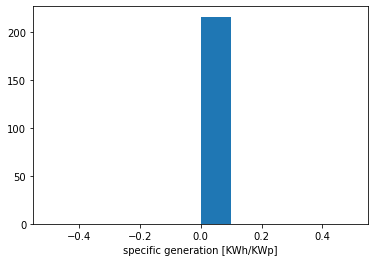

In [224]:
test.plot()


In [146]:
def wec(cutout, **params):
    """
    Generate wind generation time-series

    Extrapolates 10m wind speed with monthly surface roughness to hub
    height and evaluates the power curve.

    Parameters
    ----------
    turbine : str or dict
        A turbineconfig dictionary with the keys 'hub_height' for the
        hub height and 'V', 'POW' defining the power curve.
        Alternatively a str refering to a local or remote turbine configuration
        as accepted by atlite.resource.get_windturbineconfig().


    """

 
    return cutout.convert_and_aggregate(
        convert_func=convert_wec,  **params
    )

In [45]:
import sys
print(sys.getrecursionlimit())

3000


In [110]:
#power_matrix [Tp][Hs]
b= power_matrix[18][5.5]

In [97]:
pow = gen['Power_Matrix']

In [101]:
pow[0.0][3.5]

0

In [237]:
test = wec(cutout, capacity_factor = True)

INFO:atlite.convert:Convert and aggregate 'wec'.


-13.5 50.0
-13.5 50.25
-13.5 50.5
-13.5 50.75
-13.5 51.0
-13.5 51.25
-13.5 51.5
-13.5 51.75
-13.5 52.0
-13.5 52.25
-13.5 52.5
-13.5 52.75
-13.5 53.0
-13.5 53.25
-13.5 53.5
-13.5 53.75
-13.5 54.0
-13.5 54.25
-13.5 54.5
-13.5 54.75
-13.5 55.0
-13.5 55.25
-13.5 55.5
-13.5 55.75
-13.5 56.0
-13.5 56.25
-13.5 56.5
-13.5 56.75
-13.5 57.0
-13.5 57.25
-13.5 57.5
-13.5 57.75
-13.5 58.0
-13.5 58.25
-13.5 58.5
-13.5 58.75
-13.5 59.0
-13.5 59.25
-13.5 59.5
-13.5 59.75
-13.5 60.0
-13.5 60.25
-13.5 60.5
-13.5 60.75
-13.25 50.0
-13.25 50.25
-13.25 50.5
-13.25 50.75
-13.25 51.0
-13.25 51.25
-13.25 51.5
-13.25 51.75
-13.25 52.0
-13.25 52.25
-13.25 52.5
-13.25 52.75
-13.25 53.0
-13.25 53.25
-13.25 53.5
-13.25 53.75
-13.25 54.0
-13.25 54.25
-13.25 54.5
-13.25 54.75
-13.25 55.0
-13.25 55.25
-13.25 55.5
-13.25 55.75
-13.25 56.0
-13.25 56.25
-13.25 56.5
-13.25 56.75
-13.25 57.0
-13.25 57.25
-13.25 57.5
-13.25 57.75
-13.25 58.0
-13.25 58.25
-13.25 58.5
-13.25 58.75
-13.25 59.0
-13.25 59.25
-13.25 59.5
-13.25 